## Final Project Submission

Please fill out:
* Student name: Jack Locke
* Student pace: self paced 
* Instructor name: Mark Barbour

#  <center> Airplane Safety Data Analysis <center>

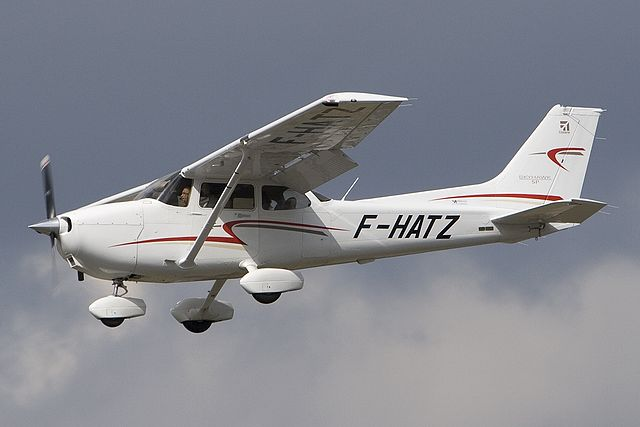

## Overview

This project will be analyzing airplane safety based on factors of risk such as aircraft damage and passenger injury severity. My analysis will focus on recommending what airplane makes, models, and number of engines will be best suited for the stakeholder's business when compared to said factors of risk. The increased safety of the airplanes sold will improve company reliability resulting in increased sales/growth for the business. I will be using the CRISP-DM (Cross-industry standard process for data mining) methodology for my analytics model. 

* 1. Business Problem
* 2. Data Understanding
    * Limitations
* 3. Data Preparation
    * a. Columns to drop
    * b. Narrowing dataset to small instructional airplanes
        * Narrowing to airplanes
        * Narrowing to instructional airplanes
        * Narrowing to small instructional airplanes
    * c. Remaining missing/null values
    * d. Consolidate top makes and models
        * Cessna makes/models dataframe
        * Piper makes/models dataframe
        * Beech makes/models dataframe
        * Mooney makes/models dataframe
        * Concatenate dataframes
* 4. Analysis
    * a. Make vs. uninjured passengers
    * b. Model vs. serious and fatal injuries
    * c. Number of engines vs. fatalities
* 5. Conclusion
* 6. Next Steps

## Business Problem

The business stakeholders are a company that is selling small airplanes for instructional purposes in the US. They are focused on selling airplanes that pose the least amount of risk to their customers from a safety perspective. This is because accidents occur more frequently during instructional training than in other airplane markets, making safety that much more important to their customers. Selling the safest airplanes in this market should lead to increased sales/growth for the company. I will be analyzing airplane safety by looking at data from small instructional airplane accidents. I will be focusing on what the stakeholders can control, such as make, model, and number of engines and compare those with our factors of safety/risk.  

## Data Understanding

The dataset from the National Transportation Safety Board includes data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. The dataset can be found here on kaggle https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses. The dataset contains over 90,000 reported accidents for all types of aircrafts. Each row represents an accident, giving information on the make, model, number of engines, aircraft damage, fatalities, injuries, non-injured etc. I will need to reduce this dataset to just small instructional airplanes for the purpose of our business problem. This dataset will help us in solving our business problem because we can see how safe the airplanes are for passengers when an accident occurs.  
### Limitations
But the dataset also possesses many limitations. I do not know the availability of the aircrafts, the cost of the aircrafts, the number of flights per aircraft, the mileage per aircraft, or any information on maintenance. Without this information I cannot say with absolute confidence which airplanes are the safest or best suited for the company (maybe the safest airplane has never been in an accident so it isnt in our dataset). I can only determine which airplanes are the most highly represented when compared to factors of risk. This will help show us trends and patterns in the data. From there, I can recommend what actions need to be taken in the future in order to confirm my suspicions on which airplanes are the safest. 

In [170]:
#import libraries to use; remove a warning this updated python version gives me for chained assignment code
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [87]:
accidents_df = pd.read_csv('data/aviation_data.csv', dtype={'Latitude': str, 'Longitude':str,
                                                            'Broad.phase.of.flight':str})

In [88]:
accidents_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [89]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

I'm going to lowercase all the columns to make them easier to deal with, but I like the period separation. 

In [90]:
accidents_df.columns = accidents_df.columns.str.lower()

My analysis will be focused on dealing with columns the stakeholders can control.
* Make
* Model
* Number of Engines
* Engine Type

And will compare those columns with our columns associated with airplane risk; what the stakeholders want to reduce or increase.
* Aircraft Damage
* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured

In [91]:
#Unknown values in this column that will need to be handled.
accidents_df['aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: aircraft.damage, dtype: int64

In [92]:
#Makes with the same name just different capitalization that will need to be fixed. 
accidents_df['make'].value_counts().head()

Cessna    22227
Piper     12029
CESSNA     4922
Beech      4330
PIPER      2841
Name: make, dtype: int64

In [93]:
#Similar model types that will have to be consolidated.
accidents_df['model'].value_counts().head()

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
Name: model, dtype: int64

In [94]:
#Do not have half or quarter parts of an engine so this will always be a whole number. Will need to change that. 
accidents_df['number.of.engines'].value_counts().head()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
Name: number.of.engines, dtype: int64

In [95]:
#Potentially deal with unknown engine types. 
accidents_df['engine.type'].value_counts().head()

Reciprocating    69530
Turbo Shaft       3609
Turbo Prop        3391
Turbo Fan         2481
Unknown           2051
Name: engine.type, dtype: int64

In [96]:
#People are whole numbers. Will need to change to int for all four injury columns.
accidents_df['total.fatal.injuries'].value_counts().head()

0.0    59675
1.0     8883
2.0     5173
3.0     1589
4.0     1103
Name: total.fatal.injuries, dtype: int64

In [97]:
accidents_df['total.serious.injuries'].value_counts().head()

0.0    63289
1.0     9125
2.0     2815
3.0      629
4.0      258
Name: total.serious.injuries, dtype: int64

In [98]:
accidents_df['total.minor.injuries'].value_counts().head()

0.0    61454
1.0    10320
2.0     3576
3.0      784
4.0      372
Name: total.minor.injuries, dtype: int64

In [99]:
accidents_df['total.uninjured'].value_counts().head()

0.0    29879
1.0    25101
2.0    15988
3.0     4313
4.0     2662
Name: total.uninjured, dtype: int64

## Data Preparation

* Drop all unnecessary columns from the dataframe. 
* Narrow our dataset to small instructional airplanes; handling missing/null values along the way. 
* Handle any remaining missing/null values. 
* Consolidate our dataset to the most highly represented makes and models so it can be analyzed in the next section. 

### Columns to drop

I am dropping columns if the column is not useful in assessing the airplane risk, if the column is something the stakeholders can't control, if the column will not help me narrow down the dataset to small instructional airplanes, or if the column will not be used for my recommendations/analysis. Essentialy, it is safe to remove these columns from the dataset as they no value to my recommendations/analysis. For example, these columns can be unique identifiers ('event.id'), columns with too much missing data ('lat','long'), or columns not involved in our business recommendations ('airport.name'). 

In [100]:
accidents_df = accidents_df.drop(columns=['latitude', 'longitude', 'airport.code', 'airport.name', 
                                          'registration.number', 'schedule', 'far.description','publication.date',
                                          'event.id','accident.number','injury.severity','report.status',
                                          'publication.date','event.date','air.carrier','weather.condition',
                                          'broad.phase.of.flight','investigation.type'])

I only want to look at accidents in the US so for 'country' and 'location' I will narrow it down and then remove those
columns. I'm not going to use any form of location for my analysis. 

In [101]:
accidents_df = accidents_df[accidents_df['country']=='United States']

In [102]:
#Will be removing other columns as we progress; create drop function for reusability
def drop(col_name):
    '''Is going to take the column name and apply the drop function'''
    accidents_df.drop(columns=col_name, inplace=True)

In [103]:
drop('location')
drop('country')

I am not going to suggest an aircraft that was built by an amateur so we will filter out any 'Yes' values and then drop the column. 

In [104]:
accidents_df = accidents_df[accidents_df['amateur.built']=='No']

In [105]:
drop('amateur.built')

### Narrowing the dataset to our stakeholders

The dataset needs to only include small instructional airplanes. I will narrow down our dataset accordingly:
* 'Aircraft.category' to get only airplanes
* 'Purpose.of.Flight' to get makes/models for only instructional airplanes
* 'Number.of.Engines', 'Engine.Type', and 'Total.Passengers' (will create) to reduce size to small instructional airplanes

#### Dataset for Airplanes

In order to first narrow our dataset to just airplanes, I have to handle all of the missing values in 'aircraft.category' so I do not lose a substantial amount of data. In order to do this, I know that the makes of aircrafts are specific to their category. Meaning, I can take the makes that are distinct to airplanes and use that to replace the missing values in 'aircraft.category' with 'airplane'. For example, if the 'aircraft.category' is Nan but the make is 'Cessna' then I know that row represents an airplane accident. 

First, I must handle missing values in our 'make' column. Then, lowercase all makes so they have the same spelling and are represented just once.

In [106]:
#missing values are low, replace missing values with mode
accidents_df['make'] = accidents_df['make'].fillna('Cessna')

In [107]:
#remove capitalization issues so makes are consolidated
accidents_df['make'] = accidents_df['make'].apply(lambda x: x.lower())

In [108]:
#checking makes of missing 'aircraft.category' data with list of largest airplane makes in order to replace Nan 
#values. 
accidents_df['aircraft.category'] = accidents_df.apply(lambda x: 
                                    'Airplane' if x['make'] in ['cessna','piper','beech','mooney','boeing']
                                    else x['aircraft.category'], axis=1)

In [109]:
#Now the dataframe only has airplanes
accidents_df = accidents_df[accidents_df['aircraft.category']=='Airplane']

I can remove the 'aircraft.category' column now as all the values are 'airplane'.

In [110]:
drop('aircraft.category')

#### Dataset for Instructional airplanes

Now I want to get airplanes that will be used for instructional purposes. If I create a list of 
instructional makes and models, then I can go through the dataset and keep all the data for makes and models that could be used for instructional purposes. That way I do not lose a lot of data by just solely looking at the 
instructional purpose of flight. For example, a Cessna 172 is a common instructional airplane, but it could be used for personal,instructional, or business reasons. I want to make sure and keep the data for all reasons as I am trying to analyze the type of airplane used for instructional purposes for our recommendations. 

In [111]:
#Missing/Unkown categorical data is low so fill in missing/unknown values with the mode.
accidents_df['purpose.of.flight'] = accidents_df['purpose.of.flight'].fillna('Personal')
accidents_df['purpose.of.flight'].replace('Unknown', 'Personal', inplace=True)

In [112]:
#create a distinct list of makes for instructional airplanes
instructional_makes = list(set(accidents_df[accidents_df['purpose.of.flight']=='Instructional']['make'].values))

In [113]:
#will go through the dataframe and if the make does not match an instructional make it'll fill the value with 'no'
accidents_df['make'] = accidents_df.apply(lambda x: 'no' if x['make'] not in instructional_makes else x['make'], 
                                          axis=1)

In [114]:
#will give us dataframe of only makes that can be instructional airplanes
accidents_df = accidents_df[accidents_df['make'] != 'no']

In [115]:
#create a distinct list of models for instructional airplanes
instructional_models = list(set(accidents_df[accidents_df['purpose.of.flight']=='Instructional']['model'].values))

In [116]:
#will go through the dataframe and if the model does not match an instructional model it'll fill the value with 'no'
accidents_df['model'] = accidents_df.apply(lambda x: 'no' if x['model'] not in instructional_models else x['model'],
                                           axis=1)

In [117]:
#will give us dataframe of only models that can be instructional airplanes
accidents_df = accidents_df[accidents_df['model'] != 'no']

Now I can drop the 'purpose.of.flight' column as it has been used to get all the data for instructional airplanes.

In [118]:
drop('purpose.of.flight')

#### Dataset for Small Instructional Airplanes

Now I will reduce the dataset to small airplanes. I know anything that is 1 engine is small but I do not know if 2
engines is small or large still, and I do not want to lose a lot of data by just looking at one engine airplanes. So we will use 'number.of.engines' and 'engine.type' to further reduce airplane size. Based on research I've done (National Business Aviation Association); it appears that reciprocating engines are mostly used on small airplanes. Additionally, if I reduce the number of passengers we can further filter out airplanes that I am certain are larger. We cannot guarentee that every airplane will be small but by reducing the number of engines, the engine type, and the number of passengers, I can greatly reduce that number so that it will not affect my analysis/recommendations. Additionally, once I get the dataset down, I will be looking at the most highly represented makes/models and can check to confirm they are all for smaller airplanes. Also, I know 0 engines isn't possible so that will be filtered out as well. I will create the total passengers column after dealing with null values for the injury columns. Source:
(https://nbaa.org/business-aviation/business-aircraft/piston-engine-aircraft/)

In [119]:
#Only airplanes with one or two engines
accidents_df = accidents_df[(accidents_df['number.of.engines']==2) | (accidents_df['number.of.engines']==1)]

In [120]:
#engines are whole numbers. Cant have half an engine or quarter of an engine. Convert to int.
accidents_df['number.of.engines'] = accidents_df['number.of.engines'].apply(lambda x: int(x))

In [121]:
#Missing/unknown values is low so fill in missing with mode.
accidents_df['engine.type'] = accidents_df['engine.type'].fillna('Reciprocating')
accidents_df['engine.type'].replace('Unknown','Reciprocating',inplace=True)

In [122]:
#only reciprocating engine type
accidents_df = accidents_df[accidents_df['engine.type']=='Reciprocating']

I can drop the engine type category now because all the planes are reciprocating engines. 

In [123]:
drop('engine.type')

Handle the missing values in the injury columns for our dataset so I can reduce the number of total passengers to six to help further narrow down the dataset to small airplanes.

In [124]:
#See mean and median for each column to know what to replace missing/null values with
accidents_df[['total.fatal.injuries','total.serious.injuries','total.minor.injuries','total.uninjured']].agg(
                                                                                                        ['median',
                                                                                                         'mean'])

,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
median,0.000000,0.000000,0.000000,1.000000
mean,0.375034,0.216923,0.284009,1.256262


In [125]:
accidents_df['total.fatal.injuries'] = accidents_df['total.fatal.injuries'].fillna(0.0)

In [126]:
accidents_df['total.serious.injuries'] = accidents_df['total.serious.injuries'].fillna(0.0)

In [127]:
accidents_df['total.minor.injuries'] = accidents_df['total.minor.injuries'].fillna(0.0)

In [128]:
accidents_df['total.uninjured'] = accidents_df['total.uninjured'].fillna(1.0)

In [129]:
#People are not continuous values/floats. They are whole numbers as we are not recording half of a person. Will 
#change all of these to data types to ints.
def whole_people(col_lst):
    '''is going to take in a list of columns and it will look at those individual columns and change their
    datatype to int'''
    for col in col_lst:
        accidents_df[col] = accidents_df[col].astype(int)

In [130]:
whole_people(['total.fatal.injuries','total.serious.injuries','total.uninjured','total.minor.injuries'])

In [131]:
#add the injury/uninjured columns together and it will give us total passengers
accidents_df['total.passengers'] = accidents_df.apply(lambda x: x['total.fatal.injuries'] 
                                                      + x['total.serious.injuries'] 
                                                      + x['total.minor.injuries'] + x['total.uninjured'], axis=1)

In [132]:
#dataframe with 6 or less passengers per airplane
accidents_df = accidents_df[accidents_df['total.passengers']<=6]

### Remaining missing/null values

Now I can handle the the missing/null values for aircraft damage to complete the dataset for small instructional 
airplanes

In [133]:
#Missing/unknown values is low so fill in with mode.
accidents_df['aircraft.damage'] = accidents_df['aircraft.damage'].fillna('Substantial')
accidents_df['aircraft.damage'].replace('Unknown','Substantial',inplace=True)

### Consolidate our dataset to the most highly represented makes/models for analysis

I do not need to be looking at all the makes/models of the dataset for the analysis/recommendations. I know there
are limitations to the dataset and all I can show is what is highly representative and give next steps/suggestions. I don't want to deal with makes/models with a small number of accidents because I don't know about availability, cost, and total flights/mileage, which all play a factor into safety. So I will show what the data highly represents.

I will take the top four makes as these account for 39,313 rows still and are 94% of our small instructional aircraft data. 

In [134]:
top_makes = ['cessna','piper','beech','mooney']

In [135]:
df_top_makes = accidents_df[accidents_df['make'].isin(top_makes)]

Now I need to consolidate the models as a lot of them are the same model type except for very minor details 
and for the sake of the analysis, I will be grouping them together into their larger model type. For example, the Cessna 170, 170N, 170A, 170R are all Cessna 170s. 
I will pair the models with their makes and create individual dataframes so then I can consolidate models without affecting other model numbers from different makes(just to be safe). Then, I will concatenate all the dataframes together. Now, I can see the top makes/models for the dataset so I can analyze the features with our factors of risk. 


In [136]:
#I am writing a function that will take in the dataframe for a make and a list of what I want to convert the 
#model to and this will consolidate the models for me. I also have two lambda functions that will get ride of 
#special characters and spaces so it is just alphanumeric. This will make it easier to sort through the model types. 
import re
df_top_makes['model']=df_top_makes['model'].apply(lambda x: re.sub(r'[^\w\s]','', x))

df_top_makes['model'] = df_top_makes['model'].apply(lambda x: x.replace(' ',''))

def model_consolidation(df_x, mod_lst):
    '''will take a dataframe and a model list and will change the model names to just the model number in the
    list'''
    for mod in mod_lst:
        df_x['model'] = df_x['model'].apply(lambda x: mod if mod in x else x)

#### Cessna models

In [137]:
#dataframe of cessna makes
df_cessna = df_top_makes[df_top_makes['make']=='cessna']

In [138]:
#list of the highest represented model numbers to consolidate to
cessna_list = ['172','150','182','152','210','180']

In [139]:
#function to consolidate model number on the dataframe
model_consolidation(df_cessna, cessna_list)

In [140]:
#dataframe of just those highly represented models
df_cessna = df_cessna[df_cessna['model'].isin(cessna_list)]

In [141]:
#Want to add identifiers at beggining so no model numbers get mixed up between different makes when we concat the 
#dataframes.
df_cessna['model'] = df_cessna['model'].apply(lambda x: 'C' + x)

#### Piper models

In [142]:
df_piper = df_top_makes[df_top_makes['make']=='piper']
piper_list = ['PA28','PA18','PA32','PA22','PA24','PA38']
model_consolidation(df_piper, piper_list)
df_piper = df_piper[df_piper['model'].isin(piper_list)]

#### Beech models

In [143]:
df_beech = df_top_makes[df_top_makes['make']=='beech']
beech_list = ['35','36','23','58','95']
model_consolidation(df_beech, beech_list)
df_beech = df_beech[df_beech['model'].isin(beech_list)]
df_beech['model'] = df_beech['model'].apply(lambda x: 'Be' + x)

#### Mooney models

In [144]:
#only 3 for the model 10 which we will not need for our analysis so we will only focus on the M20 for Mooney.
df_mooney = df_top_makes[df_top_makes['make']=='mooney']
mooney_list = ['20']
model_consolidation(df_mooney, mooney_list)
df_mooney = df_mooney[df_mooney['model']=='20']
df_mooney['model'] = df_mooney['model'].apply(lambda x: 'M' + str(x))

#### Bring the top make/model dataframes together

In [145]:
top_make_model = pd.concat([df_cessna,df_piper,df_beech,df_mooney])

In [146]:
top_make_model

,aircraft.damage,make,model,number.of.engines,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,total.passengers
2,Destroyed,cessna,C172,1,3,0,0,1,4
6,Destroyed,cessna,C180,1,4,0,0,0,4
13,Destroyed,cessna,C172,1,1,0,0,0,1
17,Destroyed,cessna,C180,1,3,0,0,0,3
18,Substantial,cessna,C172,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
89680,Substantial,mooney,M20,1,0,0,0,2,2
89825,Substantial,mooney,M20,1,0,0,0,1,1
90137,Substantial,mooney,M20,1,0,0,0,2,2
90286,Substantial,mooney,M20,1,0,0,2,0,2


I am now down to 30,142 rows from our original dataset of 41,947 rows for small instructional aircrafts. This 
accounts for 72% of the dataset and helps narrow the scope so I am only looking at the most highly represented
makes and models. 

In [147]:
#reset the index so it starts at 0
top_make_model.reset_index(inplace=True, drop=True)

In [148]:
#Save this cleaned dataset so it can be used in tableau for further investigation/analysis.
top_make_model.to_csv('./data/tableau_dataset.csv')

In [149]:
#change the order of the column names to my liking. 
top_make_model = top_make_model[['aircraft.damage','make','model','number.of.engines',
                                 'total.fatal.injuries','total.serious.injuries','total.minor.injuries',
                                 'total.uninjured','total.passengers']]

## Analysis

### Assessing airplane make risk based on number of uninjured passengers involved in a serious accident

I am looking at airplanes that suffered substantial damage or were completely destroyed as I consider that to be a serious accident. Being able to see how many people are uninjured in a serious accident helps show the safety/risk of an airplane's make. Of course, as I mentioned earlier, due to the limitations of the dataset, I can not say with certainty these will be the safest makes but only that these are the most highly represented makes. When I gather more data on availability, mileage/number of flights, and cost, I can start to be more confident in the airplane makes safety. Given data enrichment in the next steps, I can start to narrow down and confirm which makes are truly the safest and why they are represented the most. For now, we would recommend looking into this airplane makes further. 

In [151]:
#looking at serious accidents; grouping together makes based on the number of uninjured passengers
damaged_df = top_make_model[(top_make_model['aircraft.damage']=='Substantial') | 
                            (top_make_model['aircraft.damage']=='Destroyed')]
df_make_uninjured = damaged_df.groupby('make')[['total.uninjured']].sum()

In [152]:
#sorting the values by uninjured
df_make_uninjured = df_make_uninjured.sort_values(by='total.uninjured', ascending=False)

In [153]:
#turn the make index into a column for graphing. 
df_make_uninjured = df_make_uninjured.reset_index()

In [154]:
#capitalize the makes so it looks better on the graph. 
df_make_uninjured['make'] = df_make_uninjured['make'].apply(lambda x: x.capitalize())

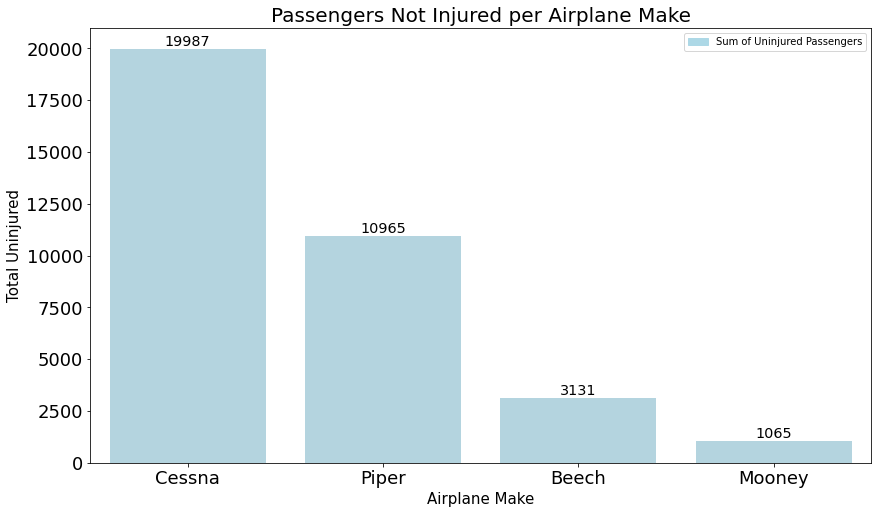

In [158]:
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x="make",  y='total.uninjured', data=df_make_uninjured, color='lightblue')


# add legend
bar = mpatches.Patch(color='lightblue', label='Sum of Uninjured Passengers')
plt.legend(handles=[bar])

for index, row in df_make_uninjured.iterrows():
    ax1.text(row.name, row['total.uninjured'], row['total.uninjured'], color='black', ha="center",
             fontsize='x-large',va='bottom')

# show the graph
plt.title('Passengers Not Injured per Airplane Make',fontsize=20)
plt.xlabel('Airplane Make',fontsize=19)
plt.ylabel('Total Uninjured',fontsize=19)
plt.tick_params(axis='x',labelsize=18)
plt.tick_params(axis='y',labelsize=18)
plt.show()


#Used stackoverflow example to see how to do the labeling on the bar graph as well as the legend.
#(https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot)
#(https://stackoverflow.com/questions/65272126/seaborn-how-to-add-legend-to-seaborn-barplot)

From highest to lowest number of uninjured passengers: Cessna, Piper, Beech, Mooney.

### Assessing airplane model risk by sum of serious and fatal injuries in a serious accident

Again, I want to look at a serious accident when assessing the airplane model safety/risk. I already assessed the makes that will result in the most amount of uninjured passengers given enrichment of our data in the next steps. If I am able to see the safest makes based on non-injured passengers, then matching the corresponding models that have the least amount of fatalities and serious injuries will give us a make/model that has the best chance of passengers only suffering a minor injury or, preferably, no injury at all. But, as I have mentioned, due to the limitations of the dataset I cannot confirm this are the safest models but only that these are the most highly represented models. When I gather more data on availability, mileage/number of flights, and cost I can start to be more confident in the airplane models safety. For now, I would recommend looking into this airplane makes and their corresponding models further. 

In [159]:
df_model_severe = damaged_df.groupby('model')[['total.fatal.injuries','total.serious.injuries']].sum()

In [160]:
#Want to create new column that is a total of fatalities and serious injuries. Then will sort the dataframe by that.
df_model_severe['severe.injuries'] = df_model_severe.apply(lambda x: x['total.fatal.injuries'] 
                                                           + x['total.serious.injuries'], axis=1)

In [161]:
df_model_severe = df_model_severe[['severe.injuries']].sort_values(by='severe.injuries')

In [162]:
df_model_severe = df_model_severe.reset_index()

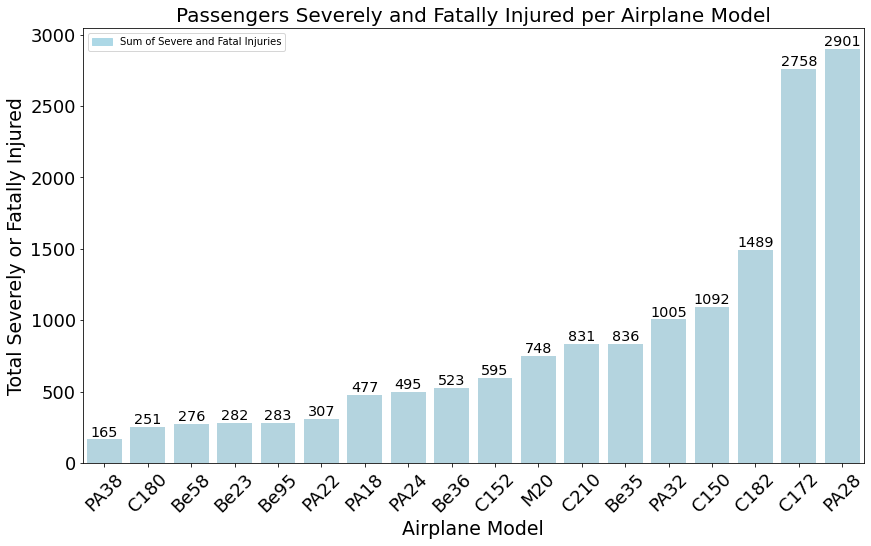

In [167]:
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x="model",  y='severe.injuries', data=df_model_severe, color='lightblue')


# add legend
bar = mpatches.Patch(color='lightblue', label='Sum of Severe and Fatal Injuries')
plt.legend(handles=[bar])

for index, row in df_model_severe.iterrows():
    ax1.text(row.name, row['severe.injuries'], row['severe.injuries'], color='black', ha="center",
             fontsize='x-large',va='bottom')

# show the graph

plt.title('Passengers Severely and Fatally Injured per Airplane Model',fontsize=20)
plt.xlabel('Airplane Model',fontsize=19)
plt.ylabel('Total Severely or Fatally Injured',fontsize=19)
plt.tick_params(axis='x',labelsize=18,rotation=45)
plt.tick_params(axis='y',labelsize=18)
plt.show()

From lowest to highest number of passengers that had serious or fatal injuries per make:
* Piper: PA38, PA22, PA18, PA24, PA32, PA28
* Cessna: C180, C152, C210, C150, C182, C172
* Beech: Be58, Be23, Be95, Be36, Be35
* Mooney: M20


### Safety of airplane engine by number by fatalities

I want to look at the total number of fatalities by engine number for small airplanes because this gives me the best indication of how to make the plane the safest operationally. If an engine has a failure, you are limited to your glide ratio and where you can land. Logically speaking, I assume that having two engines would be safer than one because in the event of an engine failure, you still have one engine that can extend your glide ratio. My graph does agree with my assumptions, but again due to limitations of the dataset I do not know the mileage/number of flights for these engine numbers so I cannot say with certainty two engines is safer than one. Given data enrichment, I can start to confirm whether this is true or not. I recommend looking into these fatality numbers further in our next steps. 

In [76]:
###Look at number of engines by fatality
df_engine = top_make_model.groupby('number.of.engines')[['total.fatal.injuries']].sum()

In [77]:
df_engine = df_engine.reset_index()

In [78]:
df_engine['number.of.engines'] = df_engine['number.of.engines'].apply(lambda x: str(x) + ' eng.')

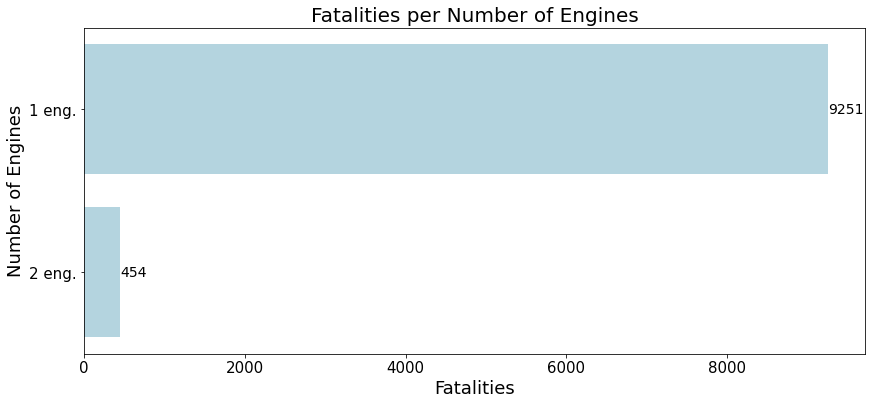

In [169]:
plt.figure(figsize=(14, 6))

ax1 = sns.barplot(x="total.fatal.injuries",  y='number.of.engines', data=df_engine, color='lightblue')

ax1.bar_label(ax1.containers[0],size=14)
# show the graph

plt.title('Fatalities per Number of Engines',fontsize=20)
plt.xlabel('Fatalities',fontsize=18)
plt.ylabel('Number of Engines',fontsize=18)
plt.tick_params(axis='y',labelsize=15)
plt.tick_params(axis='x',labelsize=15)
plt.show()

#Another way to do bar label that i learned about on stackoverflow.
#(https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn)

## Conclusions

My analysis presents three business findings. These findings can help the business figure out which airplanes will be the safest for their customers. Which, in turn, will help increase their sales of small instructional airplanes and help grow their comapny. Given these findings, I can build on our recommendations and know where to proceed next given data enrichment in the future. I am showing which makes, models, and number of engines are the most highly represented in relation to our factors of risk such as total uninjured, total serious and total fatal injuries.  

* 1. When assessing airplane make safety, I compared the total number of uninjured passengers to airplane makes involved in serious accidents; **I recommend looking further into the following makes in order to confirm which have the most uninjured passengers per accident: Cessna, Piper, Beech, and Mooney.** 
* 2. When assessing airplane model safety that will correspond with the safest makes, I compared the total number of serious and fatal injuries to airplane models involved in serious accidents; **I recommend looking further into the following models in order to give passengers the smallest chance of fatal/severe injury per accident**: 
    * **Piper- PA38, PA22, PA18, PA24, PA32, PA28** 
    * **Cessna- C180, C152, C210, C150, C182, C172**
    * **Beech- Be58, Be23, Be95, Be36, Be35**
    * **Mooney- M20**
* 3. When assessing the total number of fatalities based on one or two engines, I assume two engines are better than one due to the increase time/glide ratio that will give the plane a better chance of a safer landing. Due to the limitations of the dataset, I cannot be certain this is the case. **I recommend looking into the number of fatalities per number of engines further, given the enrichment of our data, to confirm two engines are better than one, thus making the airplane safer.** 

## Next Steps

Further enrichment of the data will help us confirm our business recommendations. At this time, I do not know if their high representation means they are the least safe so they are involved in the most accidents. If it means they are the safest so they are flown the most, resulting in more accidents. Or maybe they are flown the most for other reasons? Is it because they are the most available? Is it because they are the cheapest?

In the next steps, I would suggest enhancing the dataset by finding more data on make/model/engine: 

* availability
* cost
* total flights
* total mileage
* maintenance

With the increased information, I can more confidently confirm which makes, models, and number of engines will be the safest. Given that information, I can suggest which airplanes would be best suited for the company based on safety/risk. Additionally, I can start to confirm these are the most well suited airplanes in relation to cost and availability as well. Then the company will know which small instructional aircrafts will be of best service for their business. 